<a href="https://colab.research.google.com/github/LiTaokui/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# introduction to regression with neural network in tensorflow

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
## creating some data to view and fit

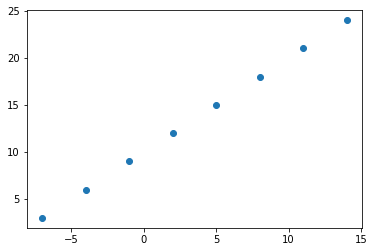

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it 
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
## input and output shape

In [ ]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# turn our numpy arrays to tensors
x = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

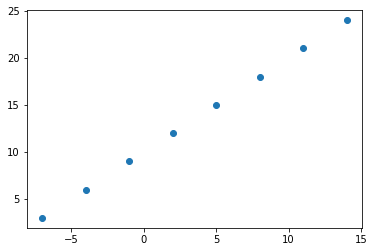

In [ ]:
plt.scatter(x, y)

In [ ]:
# steps in modeling a tensorflow

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
       optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
       metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 502ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# check out X and y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

In [ ]:
## improve our model
# 1. create a model, add more layers, change activation function
# 2. compile a model, change the optimization & the learning rate
# 3. fit a model, change the epochs

In [ ]:
# let's rebuild our model

# 1. create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
       optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
       metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 281ms/step - loss: 10.5874 - mae: 10.5874
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4549 - mae: 10.4549
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3224 - mae: 10.3224
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1899 - mae: 10.1899
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0574 - mae: 10.0574
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9249 - mae: 9.9249
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.7924 - mae: 9.7924
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 9.6599 - mae: 9.6599
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 9.5274 - mae: 9.5274
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 9.3949 - mae: 9.3949
Epoch 11/100
1/1 [==============================] - 0s 14ms/step

In [ ]:
# remind ourselves of the data
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Let's see if we can make another change to improve our model

In [ ]:
# 1. create a model (add an extra hidden layer with 100 units)
model = tf.keras.Sequential([
 tf.keras.layers.Dense(100, activation="ReLU"),
 tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
       optimizer=tf.keras.optimizers.Adam(lr=0.01),
       metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 471ms/step - loss: 12.7968 - mae: 12.7968
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.9393 - mae: 11.9393
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0884 - mae: 11.0884
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2706 - mae: 10.2706
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6419 - mae: 9.6419
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0497 - mae: 9.0497
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4309 - mae: 8.4309
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.7860 - mae: 7.7860
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.1151 - mae: 7.1151
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.4158 - mae: 6.4158
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - lo

In [ ]:
# let's remind ourselves of the data
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# let's try to make a prediction
model.predict([17.0])
# this is so called "overfitting"

array([[26.48662]], dtype=float32)

In [ ]:
# 1. build a model
# 2. fit it
# 3. evaluate it
# 4. tweak a model
# 5. fit it 
# 6. evaluate 
# ...

In [ ]:
# make a bigger data
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

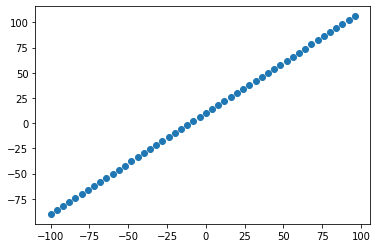

In [ ]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [ ]:
### the 3 sets...

### the 3 sets

* **training set**

* **validation set**

* **test set**

In [ ]:
# check the length of how many samples
len(X)

50

In [ ]:
# spilt the data into train and test sets
X_train = X[:40] # 80%
y_train = y[:40]

X_test = X[40:] # 20%
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

In [ ]:
### visualing the data
# plot training data in blue
plt.scatter(X_train)
plt.figure(figsize=(10,7))
